In [2]:
import numpy.matlib
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn import model_selection
from sklearn import utils
import pandas as pd
from joblib import Parallel, delayed
import scipy.io
import mne.stats as mstats
import scipy.stats as st
from scipy.stats import spearmanr

In [45]:
DataPath = 'Results/' 

fname= 'Results_diss_babies_sessions_8_decode_within_SVM_02.28.2024_16.29.17.mat'
#fname= 'Results_diss_babies_sessions_decode_within_SVM_02.28.2024_16.28.17.mat'

data = loadmat(DataPath+fname)['results'][0,0]
DA = data['DA']
times=data['times']
np.shape(DA)

(30, 1100, 8, 8)

In [30]:
# Code to help find list of included indices 

alli = [x for x in range(1,32)]

remi = [x for x in alli if x not in ex_ii]

addtl_exi = [1, 18, 22, 9, 16, 24, 29, 30 ]

remi = [x for x in remi if x not in addtl_exi]

remi

[4, 5, 7, 10, 13, 20, 21, 23, 25, 28]

In [17]:
# 16 way
# Exc: 2, 3, 6, 8, 11, 12, 14, 15, 17, 19, 31
name = 'DISS_babies_16way_session_RDM_reliability'
nstim=16

ex_ii = [2, 3, 6, 8, 11, 12, 14, 15, 17, 19, 26, 27, 31]
ex_i = [x-1 for x in ex_ii] # because python indexes from 0, keep things neat 


IDs = np.unique(data['IDs']) 

ex_ids = IDs[ex_i]

ex_ids = IDs[ex_i]

IDs = np.array([x for x in IDs if x not in ex_ids])


numsess1 = len(IDs[IDs<22000])
numsess2 = len(IDs[IDs>=22000])

sess1 = IDs[IDs<22000]
sess2 = IDs[IDs>=22000]

print(len(IDs))

for i in range(len(IDs)):
    
    if i in ex_i:
        print(str(i+1))
    else:
        print(str(i+1)+' '+str(IDs[i]))
    
print(ex_ids)

18
1 21003.0
2
3
4 21013.0
5 21017.0
6
7 21027.0
8
9 22004.0
10 22009.0
11
12
13 22013.0
14
15
16 22027.0
17
18 22031.0
[21004. 21005. 21011. 21016. 21020. 21026. 21029. 21031. 22003. 22005.
 22020. 22026. 22034.]


In [13]:
sess2

array([22003., 22004., 22005., 22009., 22010., 22011., 22013., 22016.,
       22019., 22020., 22026., 22027., 22029., 22031., 22034.])

In [47]:
# 8 way
# exc: 19
# 21017 is also excluded, only one session

nstim=8

name = 'DISS_babies_8way_session_RDM_reliability'

ex_i = [19]
ex_i = [x-1 for x in ex_i] # because python indexes from 0, keep things neat 

IDs = np.unique(data['IDs'])

ex_ids = IDs[ex_i]

IDs = np.array([x for x in IDs if x not in ex_ids])

# IDs

numsess1 = len(IDs[IDs<22000.])
numsess2 = len(IDs[IDs>=22000.])

sess1 = IDs[IDs<22000]
sess2 = IDs[IDs>=22000]


for i in range(len(IDs)):
    print(str(i+1)+' '+str(IDs[i]))
    
print(ex_ids)

1 21003.0
2 21004.0
3 21005.0
4 21009.0
5 21010.0
6 21011.0
7 21013.0
8 21016.0
9 21017.0
10 21019.0
11 21020.0
12 21026.0
13 21027.0
14 21029.0
15 21031.0
16 21034.0
17 22003.0
18 22004.0
19 22009.0
20 22010.0
21 22011.0
22 22013.0
23 22016.0
24 22019.0
25 22020.0
26 22026.0
27 22027.0
28 22029.0
29 22031.0
30 22034.0
[22005.]


In [48]:
times=data['times']
rdms = []

tmin = 300   
tmax = 500   

frames  = times[(times>=tmin) & (times<=tmax)]
frames = [int(f) for f in frames]

for i in range(0,np.shape(DA)[0]):
    RDM=np.squeeze(np.nanmean(DA[i,frames,:,:],0))
    rdms.append(RDM)

c:\users\kasht\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


In [49]:
len(sess1)


16

In [50]:

rdm1 = np.zeros(np.shape(np.ndarray.flatten(rdms[0][~np.isnan(rdms[0])])))
rdm2 = np.zeros(np.shape(np.ndarray.flatten(rdms[0][~np.isnan(rdms[0])])))
numsub=0

for i in range(0,len(sess1)):
    
    subid = sess1[i]
    
    for j in range(0,len(sess2)):

        subid2 = sess2[j]
        
        if (subid+1000 == subid2):

            r1 = rdms[i]
            r2 = rdms[len(sess1)+j]
            
            rdm1 = rdm1 + np.ndarray.flatten(r1[~np.isnan(r1)])
            rdm2 = rdm2 + np.ndarray.flatten(r2[~np.isnan(r2)])
            numsub=numsub+1
            
            break
#         else:
#             print(str(subid)+' '+str(subid2))
            
print(numsub)
    
RDM1 = rdm1/numsub
RDM2 = rdm2/numsub    
    
    

14


In [9]:

# old version not work probably bad


rdm1 = np.zeros(np.shape(np.ndarray.flatten(rdms[0][~np.isnan(rdms[0])])))
rdm2 = np.zeros(np.shape(np.ndarray.flatten(rdms[0][~np.isnan(rdms[0])])))
numsub=0

for i in range(0,numsess1):
    
    subid = IDs[i]
    
    for j in range(numsess1,numsess1+numsess2):
        
        print(str(numsess1)+' '+str(numsess1+numsess2)+' '+str(j))
        
        subid2 = IDs[j]
        
        if (subid+1000 == subid2):

            r1 = rdms[i]
            r2 = rdms[j]
            
            rdm1 = rdm1 + np.ndarray.flatten(r1[~np.isnan(r1)])
            rdm2 = rdm2 + np.ndarray.flatten(r2[~np.isnan(r2)])
            numsub=numsub+1
            
            break
#         else:
#             print(str(subid)+' '+str(subid2))
            
print(numsub)
    
RDM1 = rdm1/numsub
RDM2 = rdm2/numsub    
    
    

16 31 16
16 31 16
16 31 17
16 31 16
16 31 17
16 31 18


IndexError: list index out of range

In [51]:
# Get average RDMs ready to plot

amin = np.nanmin(RDM1)
amax = np.nanmax(RDM1)


#generating a data structure that has the coordinate pairs for the upper triangle
rdm_indices = np.triu_indices(nstim)
#creating empty RDM to fill 
rdm_empty = np.zeros([nstim,nstim])
#used to skip over the diagnol (matching stimuli)
counter = 0

#Looping every coordinate pair in RDM indices 
for i in range (0,len(rdm_indices[0])): 
    x = rdm_indices[0][i]
    y = rdm_indices [1][i]
    
#Pulling out x and y coordinates and then skipping over when they ARE EQUAL TO EACHOTHER     
    if x==y: 
        continue 
        
#populating the empty RDM with the list of 120 numbers we just got        
    rdm_empty[x,y] = RDM1[counter]
    counter = counter+1
#adding in the lower traingle (mirroring upper to pop. lower)
rdm_1 = rdm_empty.T + rdm_empty 


#creating empty RDM to fill 
rdm_empty = np.zeros([nstim,nstim])
#used to skip over the diagnol (matching stimuli)
counter = 0

#Looping every coordinate pair in RDM indices 
for i in range (0,len(rdm_indices[0])): 
    x = rdm_indices[0][i]
    y = rdm_indices [1][i]
    
#Pulling out x and y coordinates and then skipping over when they ARE EQUAL TO EACHOTHER     
    if x==y: 
        continue 
        
#populating the empty RDM with the list of 120 numbers we just got        
    rdm_empty[x,y] = RDM2[counter]
    counter = counter+1
#adding in the lower traingle (mirroring upper to pop. lower)
rdm_2 = rdm_empty.T + rdm_empty 

rdm_2

array([[ 0.        , 65.83146766, 61.29761905, 62.11105188, 58.52398721,
        63.35394456, 59.41302416, 57.00008884],
       [65.83146766,  0.        , 54.22059346, 54.12206823, 54.61584932,
        59.75382018, 57.13761549, 60.02914001],
       [61.29761905, 54.22059346,  0.        , 57.52380952, 56.55934613,
        59.11460554, 56.8137882 , 58.75053305],
       [62.11105188, 54.12206823, 57.52380952,  0.        , 53.94385217,
        60.14063611, 55.3216951 , 57.75124378],
       [58.52398721, 54.61584932, 56.55934613, 53.94385217,  0.        ,
        55.23818408, 54.88370647, 55.47512438],
       [63.35394456, 59.75382018, 59.11460554, 60.14063611, 55.23818408,
         0.        , 59.61780384, 61.00533049],
       [59.41302416, 57.13761549, 56.8137882 , 55.3216951 , 54.88370647,
        59.61780384,  0.        , 54.92173063],
       [57.00008884, 60.02914001, 58.75053305, 57.75124378, 55.47512438,
        61.00533049, 54.92173063,  0.        ]])

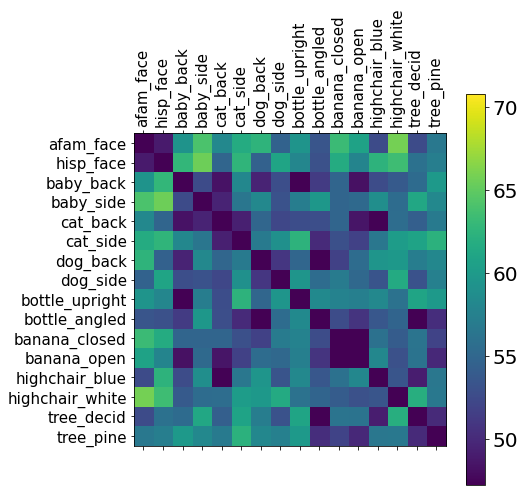

In [22]:
# Plot RDMs

# 16 way labels
labels = ['afam_face','hisp_face','baby_back','baby_side','cat_back','cat_side','dog_back','dog_side','bottle_upright','bottle_angled','banana_closed','banana_open','highchair_blue','highchair_white','tree_decid','tree_pine']

# 8 way labels 
#labels = ['face','baby','cat','dog','bottle','banana','highchair','tree']

f = plt.figure(figsize=(7,7))
plt.matshow(rdm_2, fignum=f.number, vmin=amin, vmax=amax)
plt.xticks(range(nstim), labels, fontsize=15, rotation=90)
plt.yticks(range(nstim), labels, fontsize=15)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)

plt.show()

#plt.savefig("Figures/"+name+".jpg")

In [20]:
# %uses formula from:
# % https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006397
# % sqrt of Spearman Brown:
# % split_half_noise_ceiling = sqrt(2*split_half_r./(split_half_r+1));
# % (*) "Here we define the SHnc to be zero for negative split half correlations, 
# % which is equivalent to assuming that in the case in which the observed 
# % correlation between two independent measurements of the same stimuli is 
# % negative the maximum performance that any encoding model can achieve is
# % the chance level."

def SHnc(split_half_r):
    warnings.filterwarnings(action='ignore', message='Mean of empty slice')
    
    
    split_half_r[split_half_r<0] = 0 #see above (*)
    split_half_noise_ceiling = 2*split_half_r/(split_half_r+1)
    
    split_half_noise_ceiling=np.sqrt(split_half_noise_ceiling)
    
    return(split_half_noise_ceiling)


In [19]:
def split_half_perm_sessions(nsplithalfs, RDM1,RDM2):
    warnings.filterwarnings(action='ignore', message='Mean of empty slice')

    split_half_r_perm = [] 

    for i in range (0,nsplithalfs):  
        split1, split2 =sklearn.model_selection.train_test_split(RDM, test_size=0.5)

        split1= RDM1 #np.ndarray.flatten(np.squeeze(np.nanmean(split1,0)))
        split2= RDM2 #np.ndarray.flatten(np.squeeze(np.nanmean(split2,0)))

        #split1 = split1[~np.isnan(split1)]
        #split2 = split2[~np.isnan(split2)]


        
        split2=split2[np.random.permutation(len(split2))]

        
        df = pd.DataFrame({'split1': split1,'split2': split2})
        rmat=df.corr()

        x=rmat['split1'][1]
        split_half_r_perm.append(x)

    return(split_half_r_perm)

In [17]:
warnings.filterwarnings(action='ignore', message='Mean of empty slice')



# RDM1 = np.ndarray.flatten(rdms[sess1[i]][~np.isnan(rdms[sess1[i]])])
# RDM2 = np.ndarray.flatten(rdms[sess2[i]][~np.isnan(rdms[sess2[i]])])

#split half reliability

nsplithalfs=100
ns=np.shape(DA)[0]
split_half_r=[]

for i in range(1,nsplithalfs):
    #split1, split2 = sklearn.model_selection.train_test_split(RDM, test_size=0.5)
    split1= RDM1 #np.ndarray.flatten(np.squeeze(np.nanmean(split1,0)))
    split2= RDM2 #np.ndarray.flatten(np.squeeze(np.nanmean(split2,0)))

    #split1 = split1[~np.isnan(split1)]
    #split2 = split2[~np.isnan(split2)]

    df = pd.DataFrame({'split1': split1,'split2': split2})
    rmat=df.corr()
    x=rmat['split1'][1]
    split_half_r.append(x)
    
    print(rmat)

split_half_r=np.array(split_half_r)
split_half_noise_ceiling = SHnc(split_half_r)



# npermH0= 10000


# split_half_r_H0=Parallel(n_jobs=8, verbose=5)(delayed(split_half_perm_sessions)(nsplithalfs, RDM1, RDM2) \
#                                                       for perm in range(0,npermH0))

# split_half_r_H0=np.array(split_half_r_H0)

# split_half_noise_ceiling_H0 = np.mean(SHnc(split_half_r_H0),1)


# rdm_all=np.squeeze(np.mean(RDM,0))
# rdm_all[np.isnan(rdm_all)]=0
# rdm_all=rdm_all+rdm_all.T

# results = {}
# results['rdm'] = rdm_all
# results['shnc'] = split_half_noise_ceiling
# #  results['shr'] = split_half_r
# results['shnc0'] = split_half_noise_ceiling_H0
# #   results['shr0'] = split_half_r_H0
# results['time'] = [tmin, tmax]
# #results['file'] = DataFiles[count]

# scipy.io.savemat('RDMs/'+name+'_'+str(tmin)+'_'+str(tmax)+'_groupavg'+'.mat', results)




NameError: name 'RDM1' is not defined

In [52]:
file = name+'_'+str(tmin)+'_'+str(tmax)+'_groupavg'+'.mat'

file = 'DISS_babies_16way_session_RDM_reliability'+'_'+str(tmin)+'_'+str(tmax)+'_groupavg'+'.mat'
file = 'DISS_babies_8way_session_RDM_reliability'+'_'+str(tmin)+'_'+str(tmax)+'_groupavg'+'.mat'

DataPath = 'RDMs/'


aSHs=[]
aSH0s=[]

ardms=[]

aPerc=[]

rdm_data = loadmat(DataPath+file) 
aSHs.append(np.nanmean(rdm_data['shnc']))
aSH0s.append(np.nanmean(rdm_data['shnc0']))

ardms.append(np.nanmean(rdm_data['rdm']))

perc5 = np.percentile(rdm_data['shnc0'],2.5)
perc95 = np.percentile(rdm_data['shnc0'],97.5)

nhigh = len([x for x in rdm_data['shnc0'][0] if (x>aSHs[0])])
ntot = len(rdm_data['shnc0'])

p = nhigh/ntot


aPerc.append([perc5, perc95])
    

aPerc = np.array(aPerc).T


In [53]:
print(aSH0s)
print(aSHs)
print(p)

[0.23589155765498562]
[0.8175074689151964]
0.0


In [43]:
[x for x in rdm_data['shnc0'][0] if (x>aSHs[0])]

np.min(rdm_data['shnc0'][0])

0.09728249683753167

In [ ]:
rho, p = spearmanr(timepoint, cor_rdm)

# Between individuals
- Likely won't use idk

In [222]:

sess1 = []
sess2 = []
numsub=0

for i in range(0,numsess1):
    
    subid = IDs[i]
    
    for j in range(numsess1,numsess1+numsess2):
        
        subid2 = IDs[j]
        
        if (subid+1000 == subid2):

            r1 = rdms[i]
            r2 = rdms[j]
            
            sess1.append(r1)
            sess2.append(r2)
            numsub=numsub+1
            
            break
#         else:
#             print(str(subid)+' '+str(subid2))
            
print(numsub)
    

14


In [223]:
# %uses formula from:
# % https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006397
# % sqrt of Spearman Brown:
# % split_half_noise_ceiling = sqrt(2*split_half_r./(split_half_r+1));
# % (*) "Here we define the SHnc to be zero for negative split half correlations, 
# % which is equivalent to assuming that in the case in which the observed 
# % correlation between two independent measurements of the same stimuli is 
# % negative the maximum performance that any encoding model can achieve is
# % the chance level."

def SHnc(split_half_r):
    warnings.filterwarnings(action='ignore', message='Mean of empty slice')
    
    
    split_half_r[split_half_r<0] = 0 #see above (*)
    split_half_noise_ceiling = 2*split_half_r/(split_half_r+1)
    
    split_half_noise_ceiling=np.sqrt(split_half_noise_ceiling)
    
    return(split_half_noise_ceiling)


In [224]:
def split_half_perm_sessions(nsplithalfs, RDM1,RDM2):
    warnings.filterwarnings(action='ignore', message='Mean of empty slice')

    split_half_r_perm = [] 

    for i in range (0,nsplithalfs):  
        split1, split2 =sklearn.model_selection.train_test_split(RDM, test_size=0.5)

        split1= RDM1 #np.ndarray.flatten(np.squeeze(np.nanmean(split1,0)))
        split2= RDM2 #np.ndarray.flatten(np.squeeze(np.nanmean(split2,0)))

        #split1 = split1[~np.isnan(split1)]
        #split2 = split2[~np.isnan(split2)]


        
        split2=split2[np.random.permutation(len(split2))]

        
        df = pd.DataFrame({'split1': split1,'split2': split2})
        rmat=df.corr()

        x=rmat['split1'][1]
        split_half_r_perm.append(x)

    return(split_half_r_perm)

In [225]:
warnings.filterwarnings(action='ignore', message='Mean of empty slice')



count=0
for i in range(0,len(sess1)):

    
    RDM1 = np.ndarray.flatten(sess1[i][~np.isnan(sess1[i])])
    RDM2 = np.ndarray.flatten(sess2[i][~np.isnan(sess2[i])])

    #split half reliability

    nsplithalfs=100
    ns=np.shape(DA)[0]
    split_half_r=[]

    for i in range(1,nsplithalfs):
        #split1, split2 = sklearn.model_selection.train_test_split(RDM, test_size=0.5)
        split1= RDM1 #np.ndarray.flatten(np.squeeze(np.nanmean(split1,0)))
        split2= RDM2 #np.ndarray.flatten(np.squeeze(np.nanmean(split2,0)))

        #split1 = split1[~np.isnan(split1)]
        #split2 = split2[~np.isnan(split2)]

        df = pd.DataFrame({'split1': split1,'split2': split2})
        rmat=df.corr()
        x=rmat['split1'][1]
        split_half_r.append(x)

    split_half_r=np.array(split_half_r)
    split_half_noise_ceiling = SHnc(split_half_r)



    npermH0= 10000


    split_half_r_H0=Parallel(n_jobs=8, verbose=5)(delayed(split_half_perm_sessions)(nsplithalfs, RDM1, RDM2) \
                                                          for perm in range(0,npermH0))

    split_half_r_H0=np.array(split_half_r_H0)

    split_half_noise_ceiling_H0 = np.mean(SHnc(split_half_r_H0),1)


    rdm_all=np.squeeze(np.mean(RDM,0))
    rdm_all[np.isnan(rdm_all)]=0
    rdm_all=rdm_all+rdm_all.T

    results = {}
    results['rdm'] = rdm_all
    results['shnc'] = split_half_noise_ceiling
    #  results['shr'] = split_half_r
    results['shnc0'] = split_half_noise_ceiling_H0
    #   results['shr0'] = split_half_r_H0
    results['time'] = [tmin, tmax]
    #results['file'] = DataFiles[count]

    scipy.io.savemat('RDMs/'+name+'_'+str(tmin)+'_'+str(tmax)+'_'+str(count)+'.mat', results)

    count=count+1


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   14.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   21.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:   31.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   42.4s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:   54.2s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 1136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=8)]: Done 2162 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  2.9min
[Parallel(n_jobs=8)]: Done 3026 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 3512 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:  4.4min
[P

[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:   52.2s
[Parallel(n_jobs=8)]: Done 866 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 1136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 2162 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed:  3.0min
[Parallel(n_jobs=8)]: Done 3026 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 3512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed:  4.7min
[Parallel(n_jobs=8)]: Done 4592 tasks      | elapsed:  5.3min
[Parallel(n_jobs=8)]: Done 5186 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 5816 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 6482 tasks      | elapsed:  7.2min
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Done 7922 tasks      | elapsed:  8.7min
[Parallel(

[Parallel(n_jobs=8)]: Done 2576 tasks      | elapsed: 974.1min
[Parallel(n_jobs=8)]: Done 3026 tasks      | elapsed: 974.7min
[Parallel(n_jobs=8)]: Done 3512 tasks      | elapsed: 975.3min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed: 975.9min
[Parallel(n_jobs=8)]: Done 4592 tasks      | elapsed: 976.6min
[Parallel(n_jobs=8)]: Done 5186 tasks      | elapsed: 977.4min
[Parallel(n_jobs=8)]: Done 5816 tasks      | elapsed: 978.1min
[Parallel(n_jobs=8)]: Done 6482 tasks      | elapsed: 978.9min
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed: 979.7min
[Parallel(n_jobs=8)]: Done 7922 tasks      | elapsed: 980.6min
[Parallel(n_jobs=8)]: Done 8696 tasks      | elapsed: 981.5min
[Parallel(n_jobs=8)]: Done 9506 tasks      | elapsed: 982.3min
[Parallel(n_jobs=8)]: Done 10000 out of 10000 | elapsed: 982.8min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  56 ta

In [ ]:
# Ran x of the 14 8way babies

In [226]:
rdmfiles = []
for count in range(0,len(results['rdm'])-1):
    n=name+'_'+str(tmin)+'_'+str(tmax)+'_'+str(count)+'.mat'
    rdmfiles.append(n)

In [227]:
rdmfiles 

['DISS_babies_8way_session_RDM_reliability_300_500_0.mat',
 'DISS_babies_8way_session_RDM_reliability_300_500_1.mat',
 'DISS_babies_8way_session_RDM_reliability_300_500_2.mat',
 'DISS_babies_8way_session_RDM_reliability_300_500_3.mat',
 'DISS_babies_8way_session_RDM_reliability_300_500_4.mat',
 'DISS_babies_8way_session_RDM_reliability_300_500_5.mat',
 'DISS_babies_8way_session_RDM_reliability_300_500_6.mat']

In [228]:

DataPath = 'RDMs/'
#rdmfiles = ["S23_2_session_RDM_reliability_150_300_0.mat","S23_2_session_RDM_reliability_150_300_1.mat","S23_2_session_RDM_reliability_150_300_2.mat","S23_2_session_RDM_reliability_150_300_3.mat","S23_2_session_RDM_reliability_150_300_4.mat","S23_2_session_RDM_reliability_150_300_5.mat","S23_2_session_RDM_reliability_150_300_6.mat","S23_2_session_RDM_reliability_150_300_7.mat","S23_2_session_RDM_reliability_150_300_8.mat","S23_2_session_RDM_reliability_150_300_9.mat","S23_2_session_RDM_reliability_150_300_10.mat"]

#rdmfiles = ["babies_2_session_RDM_reliability_50_150_0.mat","babies_2_session_RDM_reliability_50_150_1.mat","babies_2_session_RDM_reliability_50_150_2.mat","babies_2_session_RDM_reliability_50_150_3.mat"]

#rdmfiles = [""]

aSHs=[]
aSH0s=[]

ardms=[]

aPerc=[]

for file in rdmfiles:
    rdm_data = loadmat(DataPath+file) 
    aSHs.append(np.nanmean(rdm_data['shnc']))
    aSH0s.append(np.nanmean(rdm_data['shnc0']))

    ardms.append(np.nanmean(rdm_data['rdm']))
    
    perc5 = np.percentile(rdm_data['shnc0'],2.5)
    perc95 = np.percentile(rdm_data['shnc0'],97.5)
   

    aPerc.append([perc5, perc95])
    

aPerc = np.array(aPerc).T


In [232]:
aSHs

[0.5952796339569426,
 0.0,
 0.6935727241405515,
 0.0,
 0.46826244923320637,
 0.8330949519340403,
 0.0]

In [230]:
aSH0s

[0.23486428248805652,
 0.23463356380878914,
 0.23710045772226582,
 0.23642798098687484,
 0.23491862431338387,
 0.23433255032825315,
 0.2347960187908012]